<a href="https://colab.research.google.com/github/sophia62/Machine-Learning-Housing/blob/main/Dallin_Wolfer_CSE_450_Housing_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Methods:
- Split date $→$ year, month, day
- resold BOOL (id count > 1 in table)
- Price quintile by Zipcode

To-Add:
- Normalize data, save normalizing stats for holdout

## Key Insights
- $75k - 7.7mil price range | 2 orders of magnitude difference between highest and lowest
- ~90% houses sold between 75k and 1mil
- exponential trend between GRADE and PRICE
- ~90% of houses VIEW score is 0
- Best to sell in late spring, worst to sell in winter (for maximizing price)
- % of houses sold above the average price increases as the SQFT-LIVING increase
- Resold houses tend to have lower prices
- Higher-value neightborhoods/zipcodes seem centralized on a single point


In [ ]:
!pip install scikit-learn==1.5.2

In [ ]:
import pandas as pd
import math

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# DATE --> YEAR, MONTH, DAY
# all T/time components are 000000
housing[['year', 'month', 'day']] = housing['date'].apply(lambda x: pd.Series([x[:4], x[4:6], x[6:8]]))

for col in ['year', 'month', 'day']:
  housing[col] = housing[col].astype(int)

In [ ]:
housing.head(5)

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  1565930130  20141104T000000         4       3.25         3760      4675   
1  3279000420  20150115T000000         3       1.75         1460      7800   
2   194000575  20141014T000000         4       1.00         1340      5800   
3  2115510160  20141208T000000         3       1.75         1440      8050   
4  7522500005  20140815T000000         2       1.50         1780      4750   

   floors  waterfront  view  condition  ...  yr_renovated  zipcode      lat  \
0     2.0           0     0          3  ...             0    98038  47.3862   
1     1.0           0     0          2  ...             0    98023  47.3035   
2     1.5           0     2          3  ...             0    98116  47.5658   
3     1.0           0     0          3  ...             0    98023  47.3187   
4     1.0           0     0          4  ...             0    98117  47.6859   

      long  sqft_living15  sqft_lot15     price  year  month  day  
0 -122.048           3280        4033  429900.0  2014     11    4  
1 -122.382           1310        7865  233000.0  2015      1   15  
2 -122.389           1900        5800  455000.0  2014     10   14  
3 -122.390           1790        7488  258950.0  2014     12    8  
4 -122.395           1690        5962  555000.0  2014      8   15  

[5 rows x 24 columns]

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

In [ ]:
housing.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.000000e+04  20000.000000  20000.000000  20000.000000  2.000000e+04   
mean   4.580297e+09      3.370200      2.115750   2079.883100  1.501533e+04   
std    2.875295e+09      0.931931      0.770134    919.433672  3.970135e+04   
min    1.000102e+06      0.000000      0.000000    290.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904955e+09      3.000000      2.250000   1910.000000  7.620000e+03   
75%    7.309825e+09      4.000000      2.500000   2550.000000  1.071000e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.164794e+06   

            floors    waterfront          view     condition         grade  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       1.49645      0.007550      0.234900      3.409700      7.657700   
std        0.54095      0.086564      0.767692      0.651895      1.175287   
min        1.00000      0.000000      0.000000      1.000000      1.000000   
25%        1.00000      0.000000      0.000000      3.000000      7.000000   
50%        1.50000      0.000000      0.000000      3.000000      7.000000   
75%        2.00000      0.000000      0.000000      4.000000      8.000000   
max        3.50000      1.000000      4.000000      5.000000     13.000000   

       ...  yr_renovated       zipcode           lat          long  \
count  ...  20000.000000  20000.000000  20000.000000  20000.000000   
mean   ...     82.732150  98077.876850     47.559970   -122.213897   
std    ...    397.872344     53.438026      0.138517      0.140649   
min    ...      0.000000  98001.000000     47.155900   -122.519000   
25%    ...      0.000000  98033.000000     47.470675   -122.328000   
50%    ...      0.000000  98065.000000     47.571450   -122.230000   
75%    ...      0.000000  98117.000000     47.678000   -122.124000   
max    ...   2015.000000  98199.000000     47.777600   -121.315000   

       sqft_living15    sqft_lot15         price          year         month  \
count   20000.000000   20000.00000  2.000000e+04  20000.000000  20000.000000   
mean     1986.387500   12748.96040  5.394367e+05   2014.321300      6.586250   
std       685.211515   27076.48904  3.664334e+05      0.466987      3.114586   
min       399.000000     651.00000  7.500000e+04   2014.000000      1.000000   
25%      1490.000000    5100.00000  3.220000e+05   2014.000000      4.000000   
50%      1840.000000    7622.00000  4.500000e+05   2014.000000      6.000000   
75%      2360.000000   10088.25000  6.416250e+05   2015.000000      9.000000   
max      6210.000000  871200.00000  7.700000e+06   2015.000000     12.000000   

                day  
count  20000.000000  
mean      15.661900  
std        8.638276  
min        1.000000  
25%        8.000000  
50%       16.000000  
75%       23.000000  
max       31.000000  

[8 rows x 23 columns]

In [ ]:
housing.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
year             0
month            0
day              0
dtype: int64

In [ ]:
print(f'{"Column":<15} {"Unique":>7}')
for col in housing.columns:
  print(f'{col:<15} {len(housing[col].value_counts()):>7}')

Column           Unique
id                19846
date                370
bedrooms             13
bathrooms            30
sqft_living         995
sqft_lot           9297
floors                6
waterfront            2
view                  5
condition             5
grade                12
sqft_above          908
sqft_basement       301
yr_built            116
yr_renovated         70
zipcode              70
lat                4973
long                742
sqft_living15       756
sqft_lot15         8310
price              3845
year                  2
month                12
day                  31


In [ ]:
!pip install lets-plot

In [ ]:
from lets_plot import *
LetsPlot.setup_html()

In [ ]:
(
    ggplot(
        housing,
        aes(
            x='price'
        )
    )
    + geom_histogram()
)

In [ ]:
grade_prices = housing[['grade', 'price']].groupby('grade').mean().sort_values('price', ascending=False).round(2).merge(housing['grade'].value_counts(), left_index=True, right_index=True).reset_index()
grade_prices['count_log10'] = grade_prices['count'].apply(lambda x: math.log10(x))
grade_prices

grade       price  count  count_log10
0      13  3752083.33     12     1.079181
1      12  2212972.98     84     1.924279
2      11  1477233.58    366     2.563481
3      10  1074430.38   1055     3.023252
4       9   771202.74   2427     3.385070
5       8   541099.86   5597     3.747955
6       7   402604.71   8329     3.920593
7       6   302694.37   1880     3.274158
8       5   248380.35    218     2.338456
9       4   218466.07     28     1.447158
10      3   205666.67      3     0.477121
11      1   142000.00      1     0.000000

In [ ]:
mean_price = housing['price'].mean()
mean_price

539436.71295

In [ ]:
(
    ggplot(
        grade_prices,
        aes(
            x='grade',
            y='price',
            fill='count_log10'
        )
    )
    + geom_bar(stat='identity')
    + geom_hline(yintercept=mean_price, color='red')
)

In [ ]:
condition_prices = housing[['condition', 'price']].groupby('condition').mean().round(2).merge(housing['condition'].value_counts(), left_index=True, right_index=True).reset_index()
condition_prices['count_log10'] = condition_prices['count'].apply(lambda x: math.log10(x))
condition_prices

condition      price  count  count_log10
0          1  341481.03     29     1.462398
1          2  329755.52    161     2.206826
2          3  541420.51  12980     4.113275
3          4  521300.42   5247     3.719911
4          5  608237.00   1583     3.199481

In [ ]:
(
    ggplot(
        condition_prices,
        aes(
            x='condition',
            y='price',
            fill='count_log10'
        )
    )
    + geom_bar(stat='identity')
    + geom_hline(yintercept=mean_price, color='red')
)

In [ ]:
view_prices = housing[['view', 'price']].groupby('view').mean().round(2).merge(housing['view'].value_counts(), left_index=True, right_index=True).reset_index()
view_prices['count_log10'] = view_prices['count'].apply(lambda x: math.log10(x))
view_prices

view       price  count  count_log10
0     0   496054.10  18030     4.255996
1     1   804532.41    311     2.492760
2     2   794980.37    889     2.948902
3     3   962858.55    471     2.673021
4     4  1452927.58    299     2.475671

In [ ]:
(housing['view'].value_counts() / housing['view'].count() * 100).round(2).reset_index().sort_values('view')

view  count
0     0  90.15
3     1   1.56
1     2   4.44
2     3   2.36
4     4   1.50

In [ ]:
(
    ggplot(
        view_prices,
        aes(
            x='view',
            y='price',
            fill='count_log10'
        )
    )
    + geom_bar(stat='identity')
    + geom_hline(yintercept=mean_price, color='red')
)

In [ ]:
(
    ggplot(
        housing,
        aes(
            x='sqft_living',
            y='sqft_above'
        )
    )
    + geom_point()
)

In [ ]:
(
    ggplot(
        housing,
        aes(
            x='sqft_living',
            y='sqft_living15'
        )
    )
    + geom_point()
)

In [ ]:
(
    ggplot(
        housing,
        aes(
            x='sqft_lot',
            y='sqft_lot15'
        )
    )
    + geom_point()
)

In [ ]:
pd.crosstab(housing['year'], housing['month'])

month   1     2     3     4     5     6     7     8     9     10    11    12
year                                                                        
2014     0     0     0     0  1637  2017  2048  1797  1666  1723  1314  1372
2015   902  1141  1733  2049   601     0     0     0     0     0     0     0

In [ ]:
year_prices = housing[['year', 'month', 'price']]
year_prices['date'] = year_prices['year'].astype(str) + '-' + year_prices['month'].astype(str).str.zfill(2)
year_prices = year_prices.groupby('date')['price'].mean().reset_index()
year_prices

<ipython-input-112-d139daf10390>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_prices['date'] = year_prices['year'].astype(str) + '-' + year_prices['month'].astype(str).str.zfill(2)


date          price
0   2014-05  548446.227856
1   2014-06  555589.869608
2   2014-07  543120.879883
3   2014-08  535913.739009
4   2014-09  524014.562425
5   2014-10  539998.380731
6   2014-11  520962.783866
7   2014-12  522109.417638
8   2015-01  525876.514412
9   2015-02  509839.747590
10  2015-03  543064.596653
11  2015-04  564444.388970
12  2015-05  560573.226290

In [ ]:
(
    ggplot(
        year_prices,
        aes(
            x='date',
            y='price'
        )
    )
    + geom_bar(stat='identity')
    + geom_hline(yintercept=mean_price, color='red')
)

In [ ]:
pd.crosstab(housing['month'], housing['condition'])

condition  1   2     3    4    5
month                           
1          4  17   606  215   60
2          1   7   738  309   86
3          3  22  1165  448   95
4          1  15  1397  510  126
5          5  19  1427  622  165
6          3  12  1247  547  208
7          3   5  1299  564  177
8          0   9  1139  500  149
9          2  16  1078  410  160
10         1   8  1130  437  147
11         2  16   866  323  107
12         4  15   888  362  103

In [ ]:
housing['price_above_avg'] = housing['price'].apply(lambda p: True if p > mean_price else False)

In [ ]:
(
    ggplot(
        housing,
        aes(
            x='sqft_living15',
            y='price',
            fill='price_above_avg'
        )
    )
    + geom_histogram()
)

In [ ]:
(
    ggplot(
        housing,
        aes(
            x='grade',
            y='price',
            fill='price_above_avg'
        )
    )
    + geom_bar()
)

In [ ]:
(housing['waterfront'].value_counts() / housing['waterfront'].count() * 100).round(2)

waterfront
0    99.24
1     0.76
Name: count, dtype: float64

In [ ]:
housing['zipcode'].unique()

array([98038, 98023, 98116, 98117, 98034, 98065, 98031, 98075, 98028,
       98103, 98004, 98166, 98077, 98008, 98006, 98199, 98052, 98136,
       98108, 98055, 98027, 98058, 98144, 98115, 98168, 98102, 98042,
       98059, 98002, 98155, 98072, 98001, 98112, 98007, 98177, 98074,
       98119, 98011, 98014, 98106, 98045, 98033, 98125, 98133, 98053,
       98122, 98022, 98178, 98148, 98019, 98010, 98070, 98056, 98030,
       98188, 98029, 98107, 98105, 98198, 98003, 98118, 98126, 98040,
       98092, 98032, 98146, 98024, 98005, 98039, 98109])

In [ ]:
(
    ggplot(
        housing,
        aes(
            x='long',
            y='lat',
            color='zipcode'
        )
    )
    + geom_point()
)

In [ ]:
(
    ggplot(
        housing[~housing['price_above_avg']],
        aes(
            x='long',
            y='lat',
            color='price'
        )
    )
    + geom_point()
)

In [ ]:
percent_sold_high = housing['price_above_avg'].sum() / housing['price_above_avg'].count() * 100
percent_sold_high

36.99

In [ ]:
zipcode_avg_price = housing.groupby('zipcode')['price'].mean().round(2).reset_index().sort_values('price', ascending=False).rename(columns={'price': 'avg_price'})
zipcode_sell_count = housing.groupby('zipcode')['id'].count().reset_index().rename(columns={'id': 'sales'}).sort_values('sales', ascending=False)
zipcode_unique = housing.groupby('zipcode')['id'].nunique().reset_index().rename(columns={'id': 'unique'}).sort_values('unique', ascending=False)

zipcode_data = pd.merge(zipcode_avg_price, zipcode_sell_count, on='zipcode').merge(zipcode_unique, on='zipcode')

zipcode_data['above_avg_price'] = zipcode_data['avg_price'].apply(lambda x: True if x > mean_price else False)

zipcode_data['price_log10'] = zipcode_data['avg_price'].apply(lambda x: math.log10(x))

quanitle_count = 5
price_quantiles = {}
for q in range(quanitle_count):
  price_quantiles[q + 1] = (housing['price'].quantile(q / (quanitle_count)))

zipcode_data['quantile_group'] = zipcode_data['avg_price'].apply(lambda price: max([n for n in price_quantiles if price >= price_quantiles[n]]))

zipcode_data

zipcode   avg_price  sales  unique  above_avg_price  price_log10  \
0     98039  2166618.04     46      45             True     6.335782   
1     98004  1361288.32    288     286             True     6.133950   
2     98040  1206933.13    254     254             True     6.081683   
3     98112  1095133.22    249     248             True     6.039467   
4     98102   905087.56     99      99             True     5.956691   
..      ...         ...    ...     ...              ...          ...   
65    98148   285211.02     49      48            False     5.455166   
66    98001   282335.56    336     333            False     5.450766   
67    98032   253325.25    120     118            False     5.403678   
68    98168   241003.91    251     248            False     5.382024   
69    98002   235085.47    187     185            False     5.371226   

    quantile_group  
0                5  
1                5  
2                5  
3                5  
4                5  
..             ...  
65               1  
66               1  
67               1  
68               1  
69               1  

[70 rows x 7 columns]

In [ ]:
zipcode_data['avg_price'].agg(['min', 'max'])

min     235085.47
max    2166618.04
Name: avg_price, dtype: float64

In [ ]:
(
    ggplot(
        zipcode_data,
        aes(
            x='zipcode',
            y='avg_price',
            color='quantile_group',
        )
    )
    + geom_point()
    + scale_color_gradient(low='#22ccff', high='#bb0000', guide='legend')
    + scale_x_discrete(
        breaks=[code for code in zipcode_data.sort_values('avg_price', ascending=True)['zipcode'].unique()],
        labels=[]
    )
    + labs(
        title="Zipcodes Sorted by Average Price",
        x="Zipcode",
        y="Average Price ($)",
        color="Quantile"
    )
)

In [ ]:
price_quantiles

{1: 75000.0, 2: 298990.0, 3: 399950.0, 4: 518000.0, 5: 700000.0}

In [ ]:
(zipcode_data['quantile_group'].value_counts() / zipcode_data['quantile_group'].count() * 100).round(2).reset_index().sort_values('quantile_group')

quantile_group  count
4               1  12.86
3               2  18.57
1               3  21.43
0               4  28.57
2               5  18.57

In [ ]:
position_zip_data = pd.merge(housing[['lat', 'long', 'zipcode']], zipcode_data, on='zipcode')
position_zip_data.head(5)

lat     long  zipcode  avg_price  sales  unique  above_avg_price  \
0  47.3862 -122.048    98038  367155.25    550     547            False   
1  47.3035 -122.382    98023  287971.43    465     459            False   
2  47.5658 -122.389    98116  623072.32    308     307             True   
3  47.3187 -122.390    98023  287971.43    465     459            False   
4  47.6859 -122.395    98117  578983.05    521     516             True   

   price_log10  quantile_group  
0     5.564850               2  
1     5.459349               1  
2     5.794538               4  
3     5.459349               1  
4     5.762666               4

In [ ]:
for stat in ['sales', 'avg_price', 'above_avg_price', 'price_log10', 'quantile_group']:
  (
      ggplot(
          position_zip_data,
          aes(
              x='long',
              y='lat',
              color=stat
          )
      )
      + geom_point()
  ).show()

In [ ]:
(
    ggplot(
        mapping=aes(
            x='long',
            y='lat',
        )
    )
    + geom_point(
        data=position_zip_data[~position_zip_data['above_avg_price']],
        mapping=aes(color='avg_price'),
        size=2.25
    )
    + geom_point(
        data=position_zip_data[position_zip_data['above_avg_price']],
        color='dark_green',
        size=1.5
    )
)

In [ ]:
(
    ggplot(
        position_zip_data,
        aes(
            x='long',
            y='lat',
            color='quantile_group',
        )
    )
    + geom_point()
    + scale_color_gradient(low='#22ccff', high='#bb0000', guide='legend')
    + labs(
        title='Housing Price Quintiles by Location',
        x='Longitude',
        y='Latitude',
        color="Price Quantile"
    )
)

In [ ]:
zipcode_data = zipcode_data.set_index('zipcode')

housing['quintile'] = housing['zipcode'].apply(lambda zip: zipcode_data.loc[zip, 'quantile_group'])

zipcode_data = zipcode_data.reset_index()

housing.head(5)

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  1565930130  20141104T000000         4       3.25         3760      4675   
1  3279000420  20150115T000000         3       1.75         1460      7800   
2   194000575  20141014T000000         4       1.00         1340      5800   
3  2115510160  20141208T000000         3       1.75         1440      8050   
4  7522500005  20140815T000000         2       1.50         1780      4750   

   floors  waterfront  view  condition  ...      lat     long  sqft_living15  \
0     2.0           0     0          3  ...  47.3862 -122.048           3280   
1     1.0           0     0          2  ...  47.3035 -122.382           1310   
2     1.5           0     2          3  ...  47.5658 -122.389           1900   
3     1.0           0     0          3  ...  47.3187 -122.390           1790   
4     1.0           0     0          4  ...  47.6859 -122.395           1690   

   sqft_lot15     price  year  month  day  price_above_avg  quintile  
0        4033  429900.0  2014     11    4            False         2  
1        7865  233000.0  2015      1   15            False         1  
2        5800  455000.0  2014     10   14            False         4  
3        7488  258950.0  2014     12    8            False         1  
4        5962  555000.0  2014      8   15             True         4  

[5 rows x 26 columns]

In [ ]:
housing['id'].value_counts().value_counts()

count
1    19692
2      154
Name: count, dtype: int64

In [ ]:
sell_counts = housing['id'].value_counts().reset_index()
resold_ids = set(sell_counts[sell_counts['count'] > 1]['id'].unique())

housing['resold'] = housing['id'].apply(lambda id: True if id in resold_ids else False)

In [ ]:
resold_pricing = housing.groupby('resold')['price'].mean().round(2).reset_index()
resold_pricing

resold      price
0   False  541290.84
1    True  420892.78

In [ ]:
(
    ggplot(
        resold_pricing,
        aes(
            x='resold',
            y='price'
        )
    )
    + geom_bar(stat='identity')
    + geom_hline(yintercept=mean_price, color='red')
)

In [ ]:
high_price_resells = housing[housing['price_above_avg']].groupby('resold')['id'].count()
low_price_resells = housing[~housing['price_above_avg']].groupby('resold')['id'].count()

resell_dict = {'resold': [], 'high_price': [], 'low_price': []}
for is_resold in [True, False]:
  resell_dict['resold'] += [is_resold]
  resell_dict['high_price'] += [high_price_resells[is_resold]]
  resell_dict['low_price'] += [low_price_resells[is_resold]]

resell_counts = pd.DataFrame(resell_dict)
resell_counts['high_perc'] = (resell_counts['high_price'] / (resell_counts['high_price'] + resell_counts['low_price']) * 100).round(2)

resell_counts

resold  high_price  low_price  high_perc
0    True          70        238      22.73
1   False        7328      12364      37.21

In [ ]:
(
    ggplot(
        housing[housing['yr_renovated'] > 0],
        aes(
            x='yr_built',
            y='yr_renovated'
        )
    )
    + geom_point()
)

In [ ]:
(
    ggplot(
        housing[housing['yr_renovated'] > 0],
        aes(
            x='month',
            y='yr_built'
        )
    )
    + geom_point()
)

In [ ]:
renovation_prices = housing.groupby('yr_renovated')['price'].mean().round(2).reset_index()

renovation_prices['yr_renovated'] = renovation_prices['yr_renovated'].astype(pd.CategoricalDtype(categories=[0] + [n for n in range(1934, 2016, 1)], ordered=True))

renovation_prices

yr_renovated      price
0             0  530200.33
1          1934  459950.00
2          1940  378400.00
3          1944  521000.00
4          1945  470000.00
..          ...        ...
65         2011  621845.00
66         2012  625181.82
67         2013  655416.67
68         2014  657440.34
69         2015  632863.64

[70 rows x 2 columns]

In [ ]:
(
    ggplot(
        mapping = aes(
            x='yr_renovated',
            y='price',
        )
    )
    + geom_bar(
        data=renovation_prices[renovation_prices['yr_renovated'] == 0],
        stat='identity',
        fill='red'
    )
    + geom_bar(
        data=renovation_prices[renovation_prices['yr_renovated'] > 0],
        stat='identity'
    )
    + geom_hline(yintercept=mean_price, color='red')
)

In [ ]:
(
    ggplot(
        mapping=aes(
            x='long',
            y='lat',
            color='waterfront'
        )
    )
    + geom_point(
        data=housing[housing['waterfront'] != 1],
        size=2
    )
    + geom_point(
        data=housing[housing['waterfront'] == 1]
    )
)

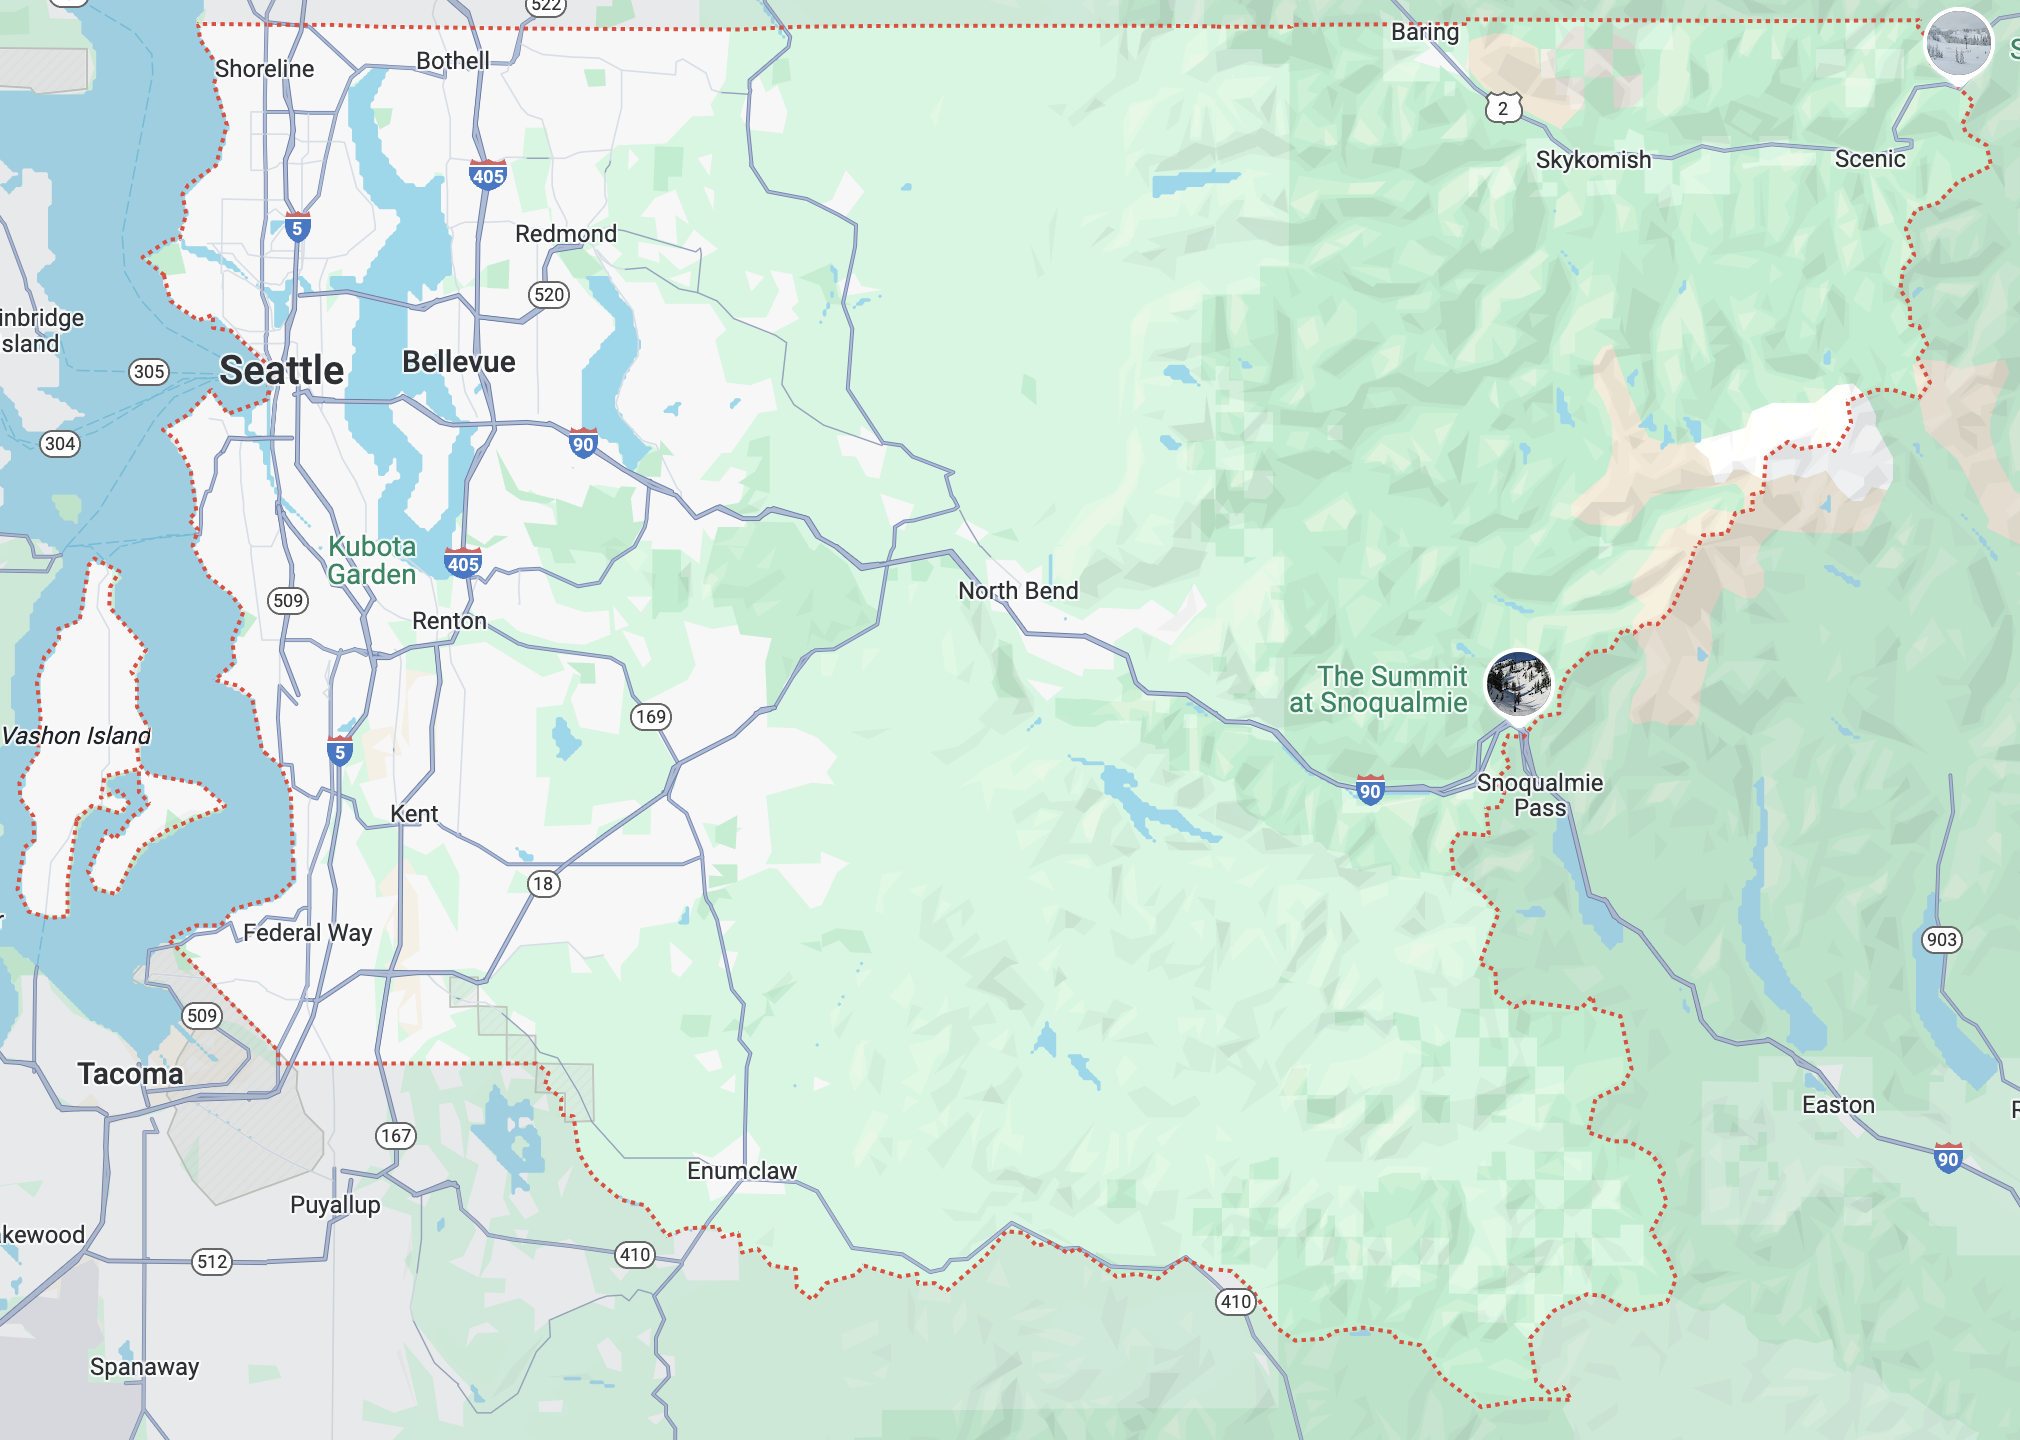

In [ ]:
(
    ggplot(
        housing.groupby('bedrooms')['price'].mean().round(2).reset_index(),
        aes(
            x='bedrooms',
            y='price'
        )
    )
    + geom_bar(stat='identity')
    + geom_hline(yintercept=mean_price, color='red')
)

In [ ]:
housing.groupby('waterfront')['price'].mean().round(2).reset_index()

waterfront       price
0           0   531122.92
1           1  1632287.36

In [ ]:
(housing.groupby('waterfront')['id'].count() / housing['id'].count() * 100).round(2)

waterfront
0    99.24
1     0.76
Name: id, dtype: float64

In [ ]:
waterfront_data = (housing.groupby('waterfront')['price_above_avg'].value_counts() / housing.groupby('waterfront')['price_above_avg'].count() * 100).round(2).reset_index().rename(columns={0: 'percent'})
waterfront_data

waterfront  price_above_avg  percent
0           0            False    63.40
1           0             True    36.60
2           1             True    88.74
3           1            False    11.26

In [ ]:
(
    ggplot(
        waterfront_data,
        aes(
            x='waterfront',
            y='percent',
            fill='price_above_avg'
        )
    )
    + geom_bar(stat='identity')
    + scale_x_discrete(breaks=[1, 0], labels=['Waterfront', 'Not Waterfront'])
)

In [ ]:
waterfront_area_data = housing.groupby('waterfront')[['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']].mean().reset_index().melt(id_vars='waterfront', value_vars=['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15'], var_name='area')

(
    ggplot(
        waterfront_area_data,
        aes(
            x='area',
            y='value',
            fill='waterfront'
        )
    )
    + geom_bar(stat='identity')
)

In [ ]:
(housing[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].mean().reset_index())

index            0
0    sqft_living   2079.88310
1       sqft_lot  15015.32895
2  sqft_living15   1986.38750
3     sqft_lot15  12748.96040

In [ ]:
(housing.apply(lambda row: pd.Series([row['sqft_living'] / row['sqft_lot'], row['sqft_living15'] / row['sqft_lot15']]), axis=1)).rename(columns={0: 'ltl', 1: 'ltl15'}).mean()

ltl      0.324440
ltl15    0.307984
dtype: float64

In [ ]:
zipcode_data = housing.groupby('zipcode')['price'].mean().round(2).reset_index().sort_values('price', ascending=False).rename(columns={'price': 'avg_price'})
quanitle_count = 5
price_quantiles = {}
for q in range(quanitle_count):
  price_quantiles[q + 1] = (housing['price'].quantile(q / (quanitle_count)))

zipcode_data['quantile_group'] = zipcode_data['avg_price'].apply(lambda price: max([n for n in price_quantiles if price >= price_quantiles[n]]))

zipcode_data

zipcode   avg_price  quantile_group
24    98039  2166618.04               5
3     98004  1361288.32               5
25    98040  1206933.13               5
48    98112  1095133.22               5
41    98102   905087.56               5
..      ...         ...             ...
61    98148   285211.02               1
0     98001   282335.56               1
20    98032   253325.25               1
64    98168   241003.91               1
1     98002   235085.47               1

[70 rows x 3 columns]

In [ ]:
## Best parameters for max r2 score

import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## PARAMETERS
max_depth = 5
eta = 0.2
subsampling = 0.8
max_leaves = 15

## SETTING UP DATA
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# DATE --> YEAR, MONTH, DAY
# all T/time components are 000000
df[['year', 'month', 'day']] = df['date'].apply(lambda x: pd.Series([x[:4], x[4:6], x[6:8]]))
df = df.drop('date', axis=1)

for col in ['year', 'month', 'day']:
  df[col] = df[col].astype(int)

## ZIPCODE -> Qunitile
zipcode_data = zipcode_data.set_index('zipcode')
df['quintile'] = df['zipcode'].apply(lambda zip: zipcode_data.loc[zip, 'quantile_group'])
zipcode_data = zipcode_data.reset_index()

## FEATURES AND TARGETS
y = df['price']
X = [col for col in df.columns if not col in ['price']]

X_train, X_test, y_train, y_test = train_test_split(df[X], y, test_size=0.2, random_state=1)

## TRAINING MODEL
model = XGBRegressor(
    max_depth=max_depth,
    eta=eta,
    max_leaves=max_leaves,
    subsample=subsampling
)
model.fit(X_train, y_train)

## PREDICT
predictions = model.predict(X_test)

result = r2_score(y_test, predictions)
result

0.8908033369398862

In [ ]:
from tqdm import tqdm

In [ ]:
test_results = {
    'max_depth': [],
    'max_leaves': [],
    'r2_score': []
}

In [ ]:
# params
max_depth = 5
eta = 0.2   # learning rate
subsampling = 0.8
max_leaves = 15

def train_range():
  for max_leaves, max_depth in tqdm([(a, b) for a in range(2, 21) for b in range(2, 16)]):
    ## DATA SPLITS
    X_train, X_test, y_train, y_test = train_test_split(df[X], y, test_size=0.2, random_state=1)

    ## TRAINING MODEL
    model = XGBRegressor(
        max_depth=max_depth,
        eta=eta,
        # sampling_method='subsample',
        max_leaves=max_leaves,
        subsample=subsampling
    )
    model.fit(X_train, y_train)

    ## PREDICT
    predictions = model.predict(X_test)

    result = r2_score(y_test, predictions)

    ## SAVE DATA
    test_results['max_depth'] += [max_depth]
    test_results['max_leaves'] += [max_leaves]
    test_results['r2_score'] += [result]

# train_range()

In [ ]:
# param_results = pd.DataFrame(test_results)

In [ ]:
# (
#     ggplot(
#         param_results,
#         aes(
#             x='max_leaves',
#             y='r2_score',
#             color='max_depth'
#         )
#     )
#     + geom_point()
#     + labs(
#         title='Max leaves and Max depth',
#         subtitle='subsampling 0.8, eta 0.2'
#     )
# )

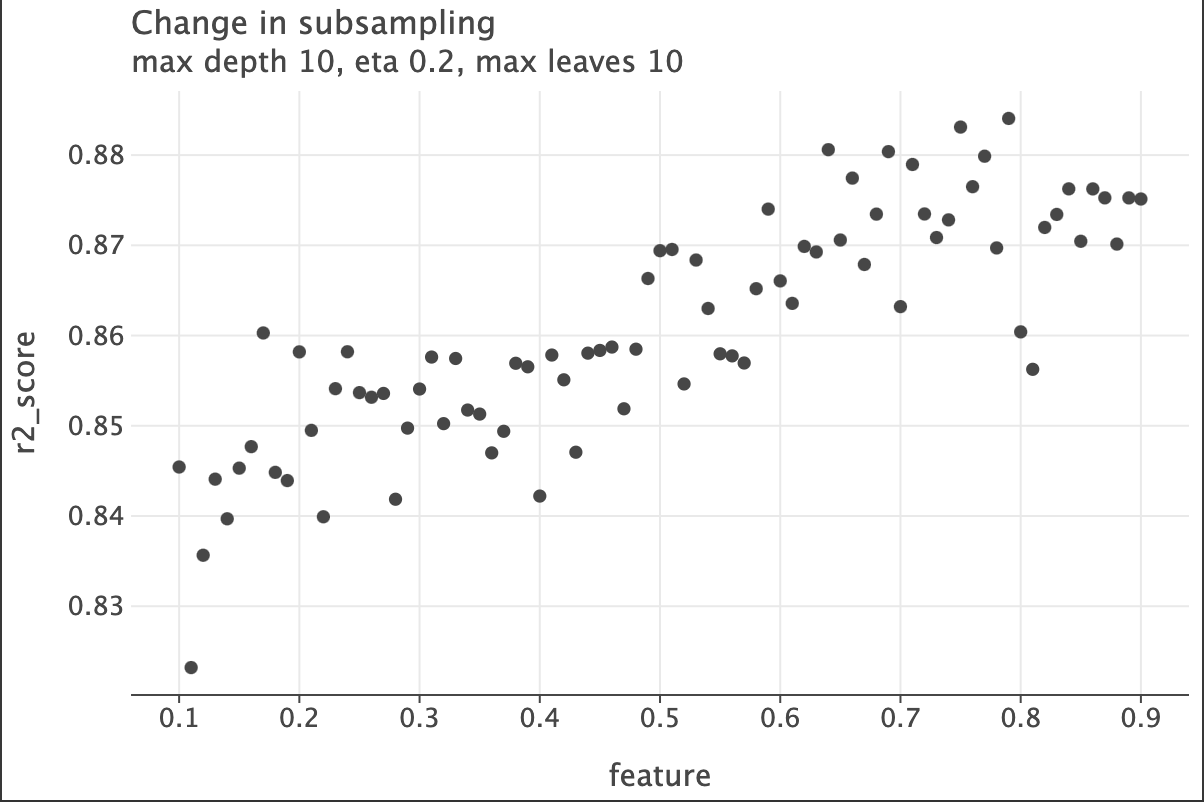

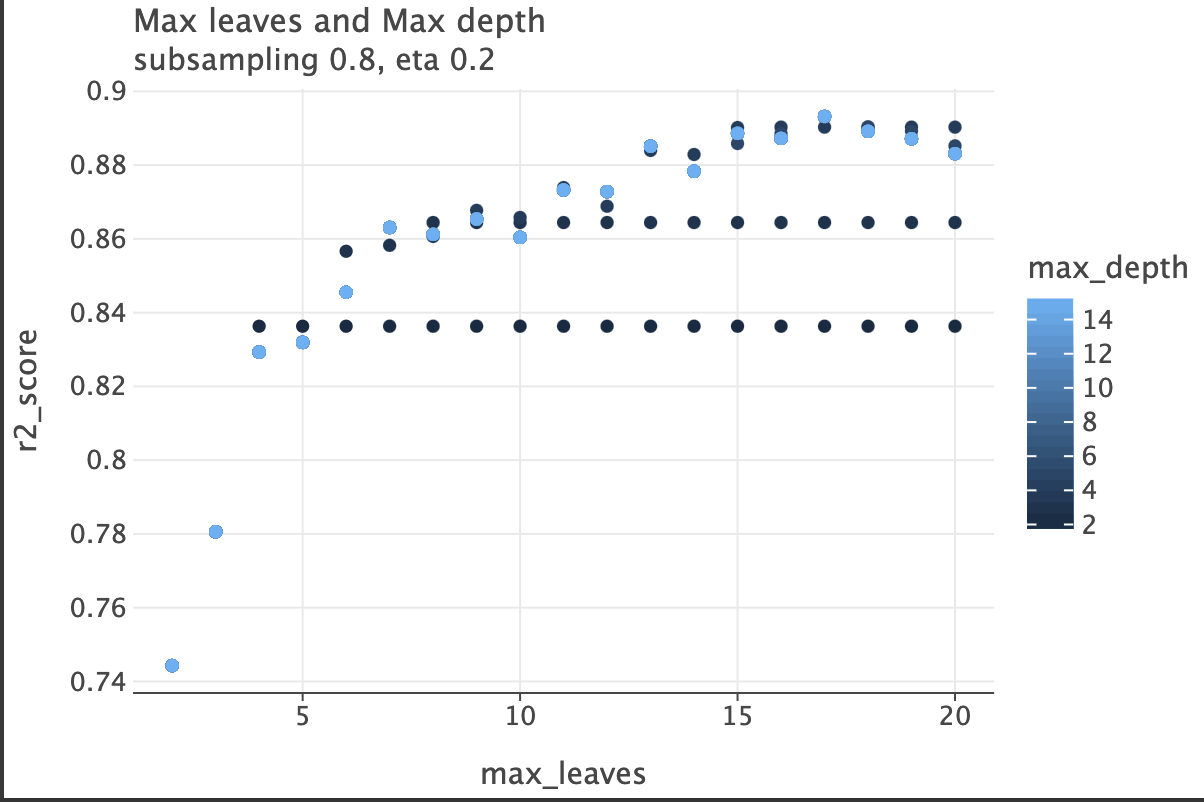

In [ ]:
## Best parameters for max rmse

import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

## PARAMETERS
max_depth = 5
eta = 0.088526
subsampling = 0.8586
# max_leaves = 20

## SETTING UP DATA
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# DATE --> YEAR, MONTH, DAY
# all T/time components are 000000
df[['year', 'month', 'day']] = df['date'].apply(lambda x: pd.Series([x[:4], x[4:6], x[6:8]]))
df = df.drop('date', axis=1)

for col in ['year', 'month', 'day']:
  df[col] = df[col].astype(int)

# Zipcode -> Quintile
zipcode_data = zipcode_data.set_index('zipcode')
df['quintile'] = df['zipcode'].apply(lambda zip: zipcode_data.loc[zip, 'quantile_group'])
zipcode_data = zipcode_data.reset_index()

## FEATURES AND TARGETS
y = df['price']
X = [col for col in df.columns if not col in ['price']]

X_train, X_test, y_train, y_test = train_test_split(df[X], y, test_size=0.2, random_state=1)

## TRAINING MODEL
model = XGBRegressor(
    max_depth=max_depth,
    eta=eta,
    n_estimators=688,
    # max_leaves=max_leaves,
    subsample=subsampling
)
model.fit(X_train, y_train)

## PREDICT
predictions = model.predict(X_test)

result = root_mean_squared_error(y_test, predictions)
result

112700.51351079118

In [ ]:
## Best parameters for max rmse

import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

## SETTING UP DATA
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv')

# DATE --> YEAR, MONTH, DAY
# all T/time components are 000000
df[['year', 'month', 'day']] = df['date'].apply(lambda x: pd.Series([x[:4], x[4:6], x[6:8]]))
df = df.drop('date', axis=1)

for col in ['year', 'month', 'day']:
  df[col] = df[col].astype(int)

# Zipcode -> Quintile
zipcode_data = zipcode_data.set_index('zipcode')
df['quintile'] = df['zipcode'].apply(lambda zip: zipcode_data.loc[zip, 'quantile_group'])
zipcode_data = zipcode_data.reset_index()

## FEATURES AND TARGETS
X = [col for col in df.columns if not col in ['price']]

## PREDICT
predictions = model.predict(df[X])

## Clean -> CSV for accuracy
pred_df = pd.DataFrame(predictions)
pred_df.to_csv("dallin-wolfer-predictions.csv", index=False)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
unique_houses = set(df['id'].unique())

df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv')
df['sold_before'] = df['id'].apply(lambda id: id in unique_houses)

df[df['sold_before']]


id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
107   7524400250  20141124T000000         3       2.00         2080     12094   
239   3332000615  20141020T000000         3       1.00         1330      3740   
340   4139420590  20140520T000000         4       3.50         4560     16643   
343   8820903380  20150102T000000         6       2.25         2660     13579   
414   7899800045  20140828T000000         3       1.50          910      5120   
443   4222310010  20150420T000000         4       1.00         1730      7350   
519   2228900270  20140812T000000         2       1.00         1010      6000   
536   3323059027  20150225T000000         3       2.75         1720     28000   
677   9238500040  20140624T000000         3       2.50         2970     23100   
691   7520000695  20141104T000000         3       1.00          840      4495   
845   2767602141  20140905T000000         3       1.50         1380      4290   
1004  9211500620  20150428T000000         3       2.25         1740      6650   
1040  9828200460  20140627T000000         2       1.00          700      4800   
1106  7504021310  20141204T000000         3       2.50         2970     11985   
1138  3969300030  20141229T000000         4       1.00         1000      7134   
1279  8832900780  20141013T000000         5       2.00         1760     21562   
1280  1568100300  20150121T000000         6       4.50         3500      8504   
1379  3598600049  20141003T000000         1       0.75          840      7203   
1522  1974300020  20150218T000000         4       2.50         2270     11500   
1591  4154300296  20150318T000000         3       1.00          960      5030   
1592   795000620  20141215T000000         3       1.00         1080      6250   

      floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
107      2.0           0     0          4  ...        2080              0   
239      1.5           0     0          3  ...        1330              0   
340      1.0           0     3          3  ...        2230           2330   
343      2.0           0     0          3  ...        2660              0   
414      1.0           0     0          3  ...         910              0   
443      1.5           0     0          4  ...        1730              0   
519      1.0           0     0          4  ...        1010              0   
536      1.0           0     0          4  ...        1720              0   
677      1.0           0     0          3  ...        1510           1460   
691      1.0           0     0          3  ...         840              0   
845      1.0           0     0          3  ...        1080            300   
1004     1.0           0     0          3  ...        1240            500   
1040     1.0           0     0          3  ...         700              0   
1106     1.0           0     0          3  ...        1770           1200   
1138     1.0           0     0          3  ...        1000              0   
1279     1.0           0     1          3  ...        1560            200   
1280     2.0           0     0          3  ...        3500              0   
1379     1.5           0     0          3  ...         840              0   
1522     1.0           0     0          3  ...        1540            730   
1591     1.0           0     0          3  ...         960              0   
1592     1.0           0     0          2  ...        1080              0   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
107       1982             0    98052  47.7035 -122.164           2230   
239       1903             0    98118  47.5502 -122.274           1330   
340       1995             0    98006  47.5521 -122.115           4060   
343       1937          1990    98125  47.7142 -122.286           1120   
414       1973             0    98106  47.5238 -122.356           1410   
443       1970             0    98003  47.3467 -122.307           1440   
519       1944    